In [1]:
import matplotlib.pyplot as plt
import fastdfe as fd

# instantiate parser
p = fd.Parser(
    n=10,
    vcf="../../resources/genome/betula/all.vcf.gz",
    stratifications=[fd.DegeneracyStratification(), fd.AncestralBaseStratification()]
)

# parse SFS
spectra: fd.Spectra = p.parse()

Counting sites: 2439037it [00:41, 58243.95it/s]
INFO:fastdfe.Parser: Using stratification: [neutral, selected].[A, C, G, T].
INFO:fastdfe.Parser: Starting to parse.
Processing sites: 100%|██████████| 2439037/2439037 [05:23<00:00, 7538.58it/s] 
INFO:fastdfe.PolyAllelicFiltration: Filtered out 0 sites.
INFO:fastdfe.DegeneracyStratification: Number of sites with valid type: 980934 / 2438327
INFO:fastdfe.AncestralBaseStratification: Number of sites with valid type: 980934 / 981644
INFO:fastdfe.Parser: Included 980934 out of 2439037 sites in total.


In [19]:
inf = fd.JointInference(
    sfs_neut=spectra['neutral.*'].merge_groups(1),
    sfs_sel=spectra['selected.*'].merge_groups(1),
    shared_params=[fd.SharedParams(params=['p_b', 'S_b'], types='all')],
    fixed_params=dict(all=dict(eps=0))
)

inf.run()

INFO:fastdfe.JointInference: Using shared parameters [SharedParams(params=['p_b', 'S_b'], types=['A', 'C', 'G', 'T'])].
INFO:fastdfe.JointInference: Including covariates: {}.
INFO:fastdfe.JointInference: Running marginal inference for type 'all'.
INFO:fastdfe.Discretization: Precomputing linear DFE-SFS transformation using midpoint integration.
INFO:fastdfe.BaseInference: Successfully finished optimization after 90 iterations and 685 function evaluations, obtaining a log-likelihood of -37.51293539207359.
INFO:fastdfe.BaseInference: Inferred parameters: {'all.S_d': -53949.40796474576, 'all.b': 0.11366118571317227, 'all.p_b': 0.0035695995726279578, 'all.S_b': 100.0, 'all.eps': 0.0}.
INFO:fastdfe.JointInference: Running marginal inferences for types ['A', 'C', 'G', 'T'].
INFO:fastdfe.JointInference: Running marginal inference for type 'A'.
INFO:fastdfe.BaseInference: Successfully finished optimization after 18 iterations and 120 function evaluations, obtaining a log-likelihood of -31.8637

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'inferred parameters'}>

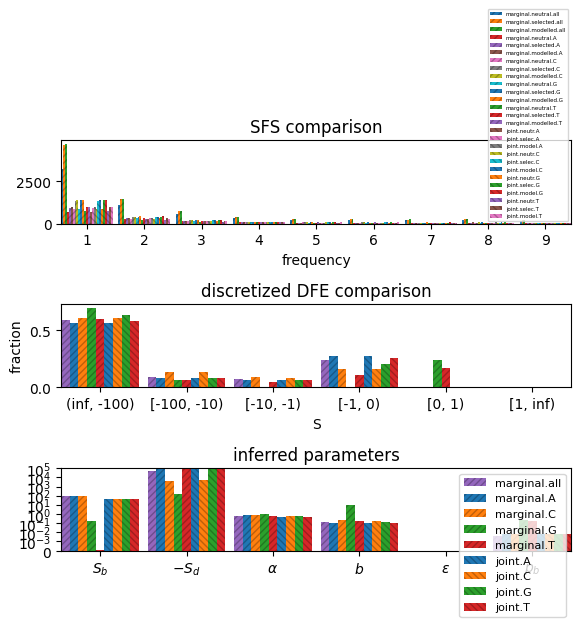

In [22]:
_, axs = plt.subplots(3, figsize=(6, 6))

inf.plot_sfs_comparison(ax=axs[0], sfs_types=['neutral', 'selected', 'modelled'], kwargs_legend=dict(prop=dict(size=4)))
inf.plot_discretized(ax=axs[1])
inf.plot_inferred_parameters(ax=axs[2])